# Amazon Copurchased - Tempo de execução da rotina de estimativa de preços

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [1]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from IPython.display import display, Math

## Experimental data

In [2]:
data_10_estimators = [
    [10000, 28],
    [20000, 73],
    [40000, 207],
    [80000, 269],
    [160000, 311]
]

data_20_estimators = [
    [10000, 34],
    [20000, 110],
    [40000, 338],
    [80000, 449],
    [160000, 477]
]

data_40_estimators = [
    [10000, 46],
    [20000, 188],
    [40000, 594],
    [80000, 731],
    [160000, 804]
]

data_500_estimators = [
    [500, 47],
    [5000, 154],
    [10000, 498],
    [15000, 1304]
]

data = data_20_estimators

sets = {
    10: data_10_estimators,
    20: data_20_estimators,
    40: data_40_estimators,
    500: data_500_estimators
}

# Plot all

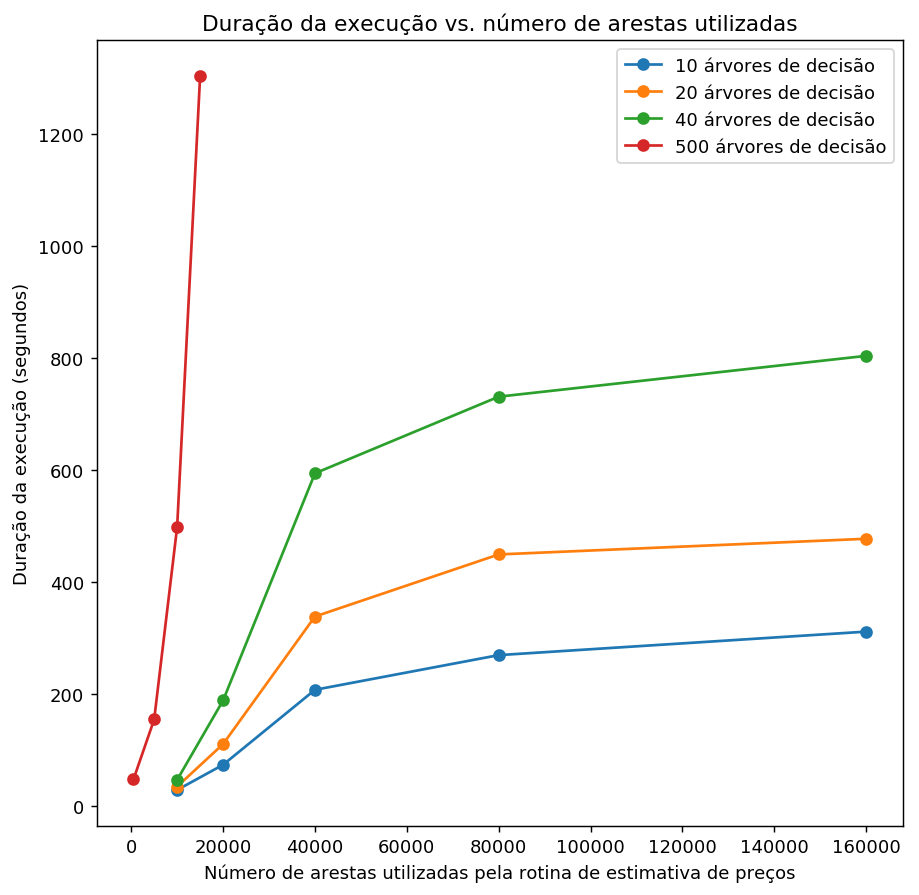

In [3]:
plt.figure(figsize=(8,8), dpi=130)
keys = sets.keys()
keys.sort()
plt.title(u'Duração da execução vs. número de arestas utilizadas')
plt.xlabel(u'Número de arestas utilizadas pela rotina de estimativa de preços')
plt.ylabel(u'Duração da execução (segundos)')
for key in keys:
    data = sets[key]
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    plt.plot(x, y, marker = 'o', label = str(key) + u' árvores de decisão')
plt.legend()
plt.show()

# Fit single data set

In [4]:
x = [d[0] for d in data]
y = [d[1] for d in data]
y_lin = [d[0]/1000 for d in data]
y_exp = [np.exp(d[0]/5000) for d in data]

## Fit linear

In [5]:
def func(x, b, a):
    return a*x + b

reg = curve_fit(func, x, y)

def lin_func(x):
    return func(x, *reg[0])

y_lin = [lin_func(i) for i in x]

### Obtained model

In [6]:
display(Math(r'y_{{lin}}(x) = {} + {}x'.format(*[round(i*10000)/10000 for i in reg[0]])))

<IPython.core.display.Math object>

## Fit exponential

In [7]:
def func(x, d, b, c, a):
    return a*b**(c*x) + d

reg = curve_fit(func, x, y)

def exp_func(x):
    return func(x, *reg[0])

y_exp = [exp_func(i) for i in x]

/home/rafael/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/home/rafael/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


### Obtained model

In [8]:
latex = r'y_{{exp}}(x) = {} + {} \cdot {}^{{{}x}}'.format(*[round(i*10000)/10000 for i in reg[0]])
print latex
display(Math(latex))

y_{exp}(x) = -57.1863 + 1.0002 \cdot 0.9297^{89.5466x}


<IPython.core.display.Math object>

## Plot

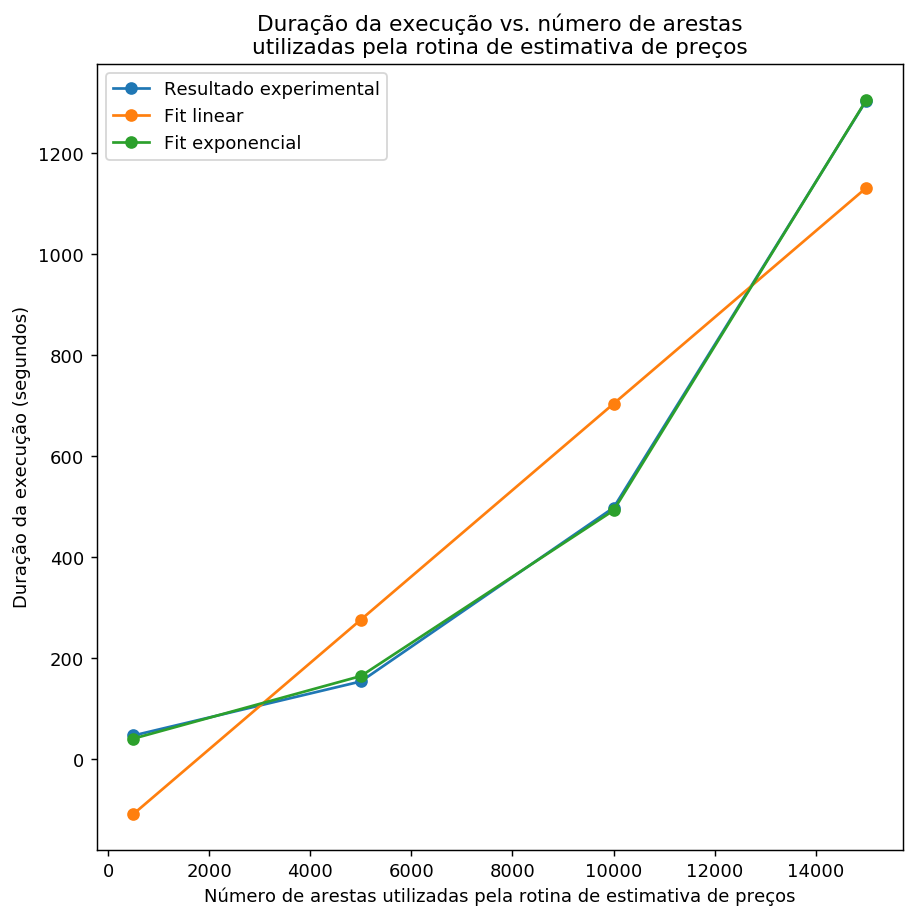

In [9]:
plt.figure(figsize=(8,8), dpi=130)                                                                                  
plt.plot(x, y, marker='o', label=u'Resultado experimental')
plt.plot(x, y_lin, marker='o', label=u'Fit linear')
plt.plot(x, y_exp, marker='o', label=u'Fit exponencial')
plt.ylabel(u'Duração da execução (segundos)')
plt.xlabel(u'Número de arestas utilizadas pela rotina de estimativa de preços')
plt.title(u'Duração da execução vs. número de arestas\nutilizadas pela rotina de estimativa de preços')
plt.legend()
plt.show()

## Predicted duration

Predicted duration for 250.000 edges (in seconds):

In [10]:
exp_func(250000)

4.514879093537907e+21